In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,ConfusionMatrixDisplay
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Project Documentation: Breast Cancer Prediction
### Project Aim
* **Primary Goal**: To automate the detection of breast cancer by classifying tumors as Malignant or Benign based on diagnostic measurements.
* **Comparative Analysis**: To evaluate and compare the predictive performance of Deep Learning (Neural Networks) versus classical Machine Learning (Support Vector Machines).
## 1. Data Loading & Exploration
- Load dataset  
- Preview data  
- Check missing values  
- Data summary  

## 2. Data Preprocessing
- Remove duplicates  
- Encode target variable  
- Handle outliers (IQR method)  

## 3. Exploratory Data Analysis (EDA)
- Correlation heatmap  
- Feature–target correlation  
- Pairplot of key features  
- Feature distribution (histograms)  

## 4. Feature Engineering & Scaling
- Separate features and target  
- Standardize features  

## 5. Dimensionality Reduction (PCA)
- Apply PCA (95% variance retention)  

## 6. Data Splitting
- Train–test split (80/20)  

## 7. Neural Network Model (Model 1)
- Build architecture  
- Compile model  
- Train model  
- Evaluate performance  
- Plot learning curves  
- Confusion matrix  

## 8. Neural Network Model (Model 2)
- Retrain model  
- Performance evaluation  
- Confusion matrix  

## 9. Support Vector Machine (SVM)
- Train–test split (scaled data)  
- Hyperparameter tuning (kernel, C)  
- Model evaluation  
- Confusion matrix  

## 10. Model Comparison
- ROC curve comparison  
- Performance metrics comparison (Accuracy, Precision, Recall, F1-score)  


In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop_duplicates(inplace=True)
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
def handle_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] > upper_bound, upper_bound,np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df
df = handle_outliers(df)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

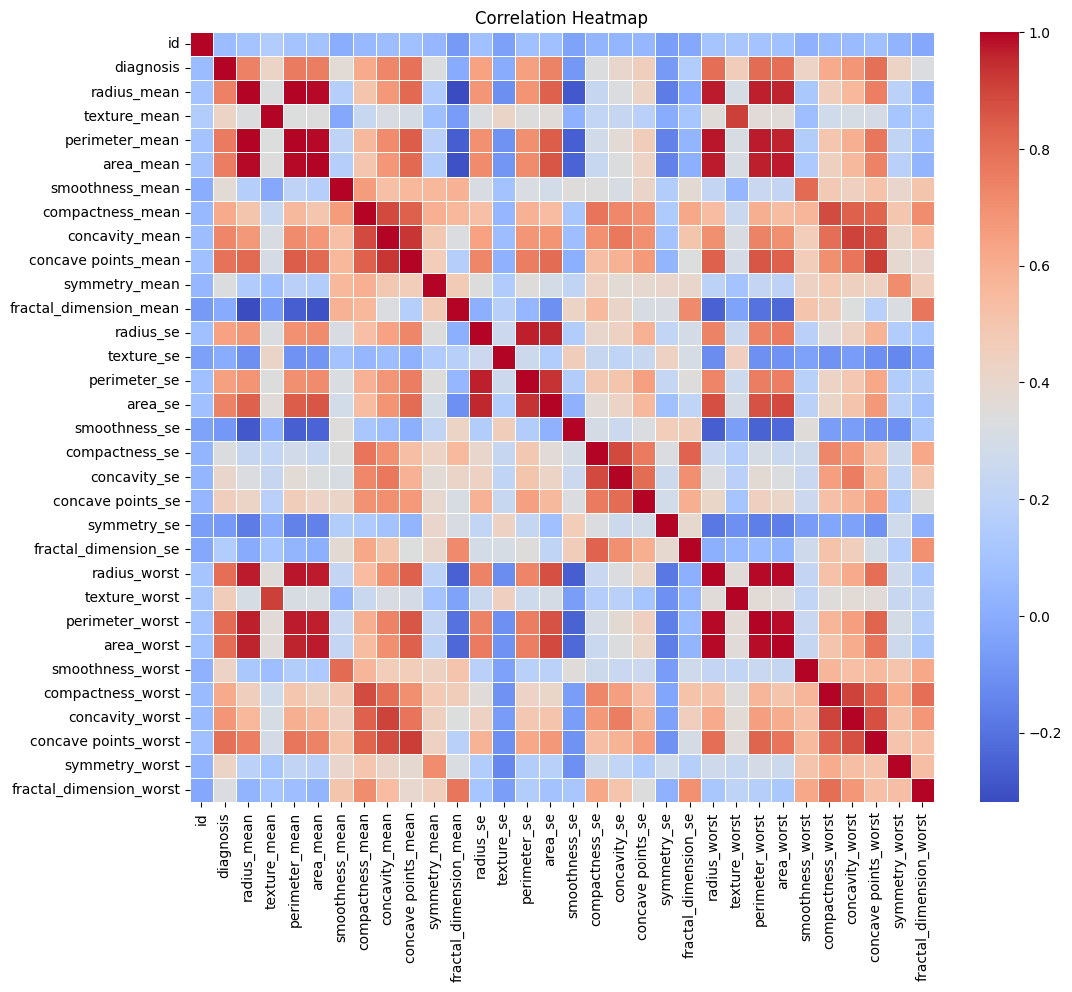

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr2=corr['diagnosis']
corr2=corr2.sort_values(ascending=False)
print(corr2)

diagnosis                  1.000000
perimeter_worst            0.800618
area_worst                 0.794640
radius_worst               0.793938
concave points_worst       0.793566
concave points_mean        0.788099
perimeter_mean             0.759006
area_mean                  0.752786
radius_mean                0.745217
area_se                    0.739068
concavity_mean             0.727168
concavity_worst            0.683565
perimeter_se               0.646875
radius_se                  0.642399
compactness_worst          0.611083
compactness_mean           0.608494
texture_worst              0.457663
concave points_se          0.450133
smoothness_worst           0.423390
texture_mean               0.419123
symmetry_worst             0.419058
concavity_se               0.398120
smoothness_mean            0.366931
symmetry_mean              0.334536
compactness_se             0.331837
fractal_dimension_worst    0.328719
fractal_dimension_se       0.154061
id                         0

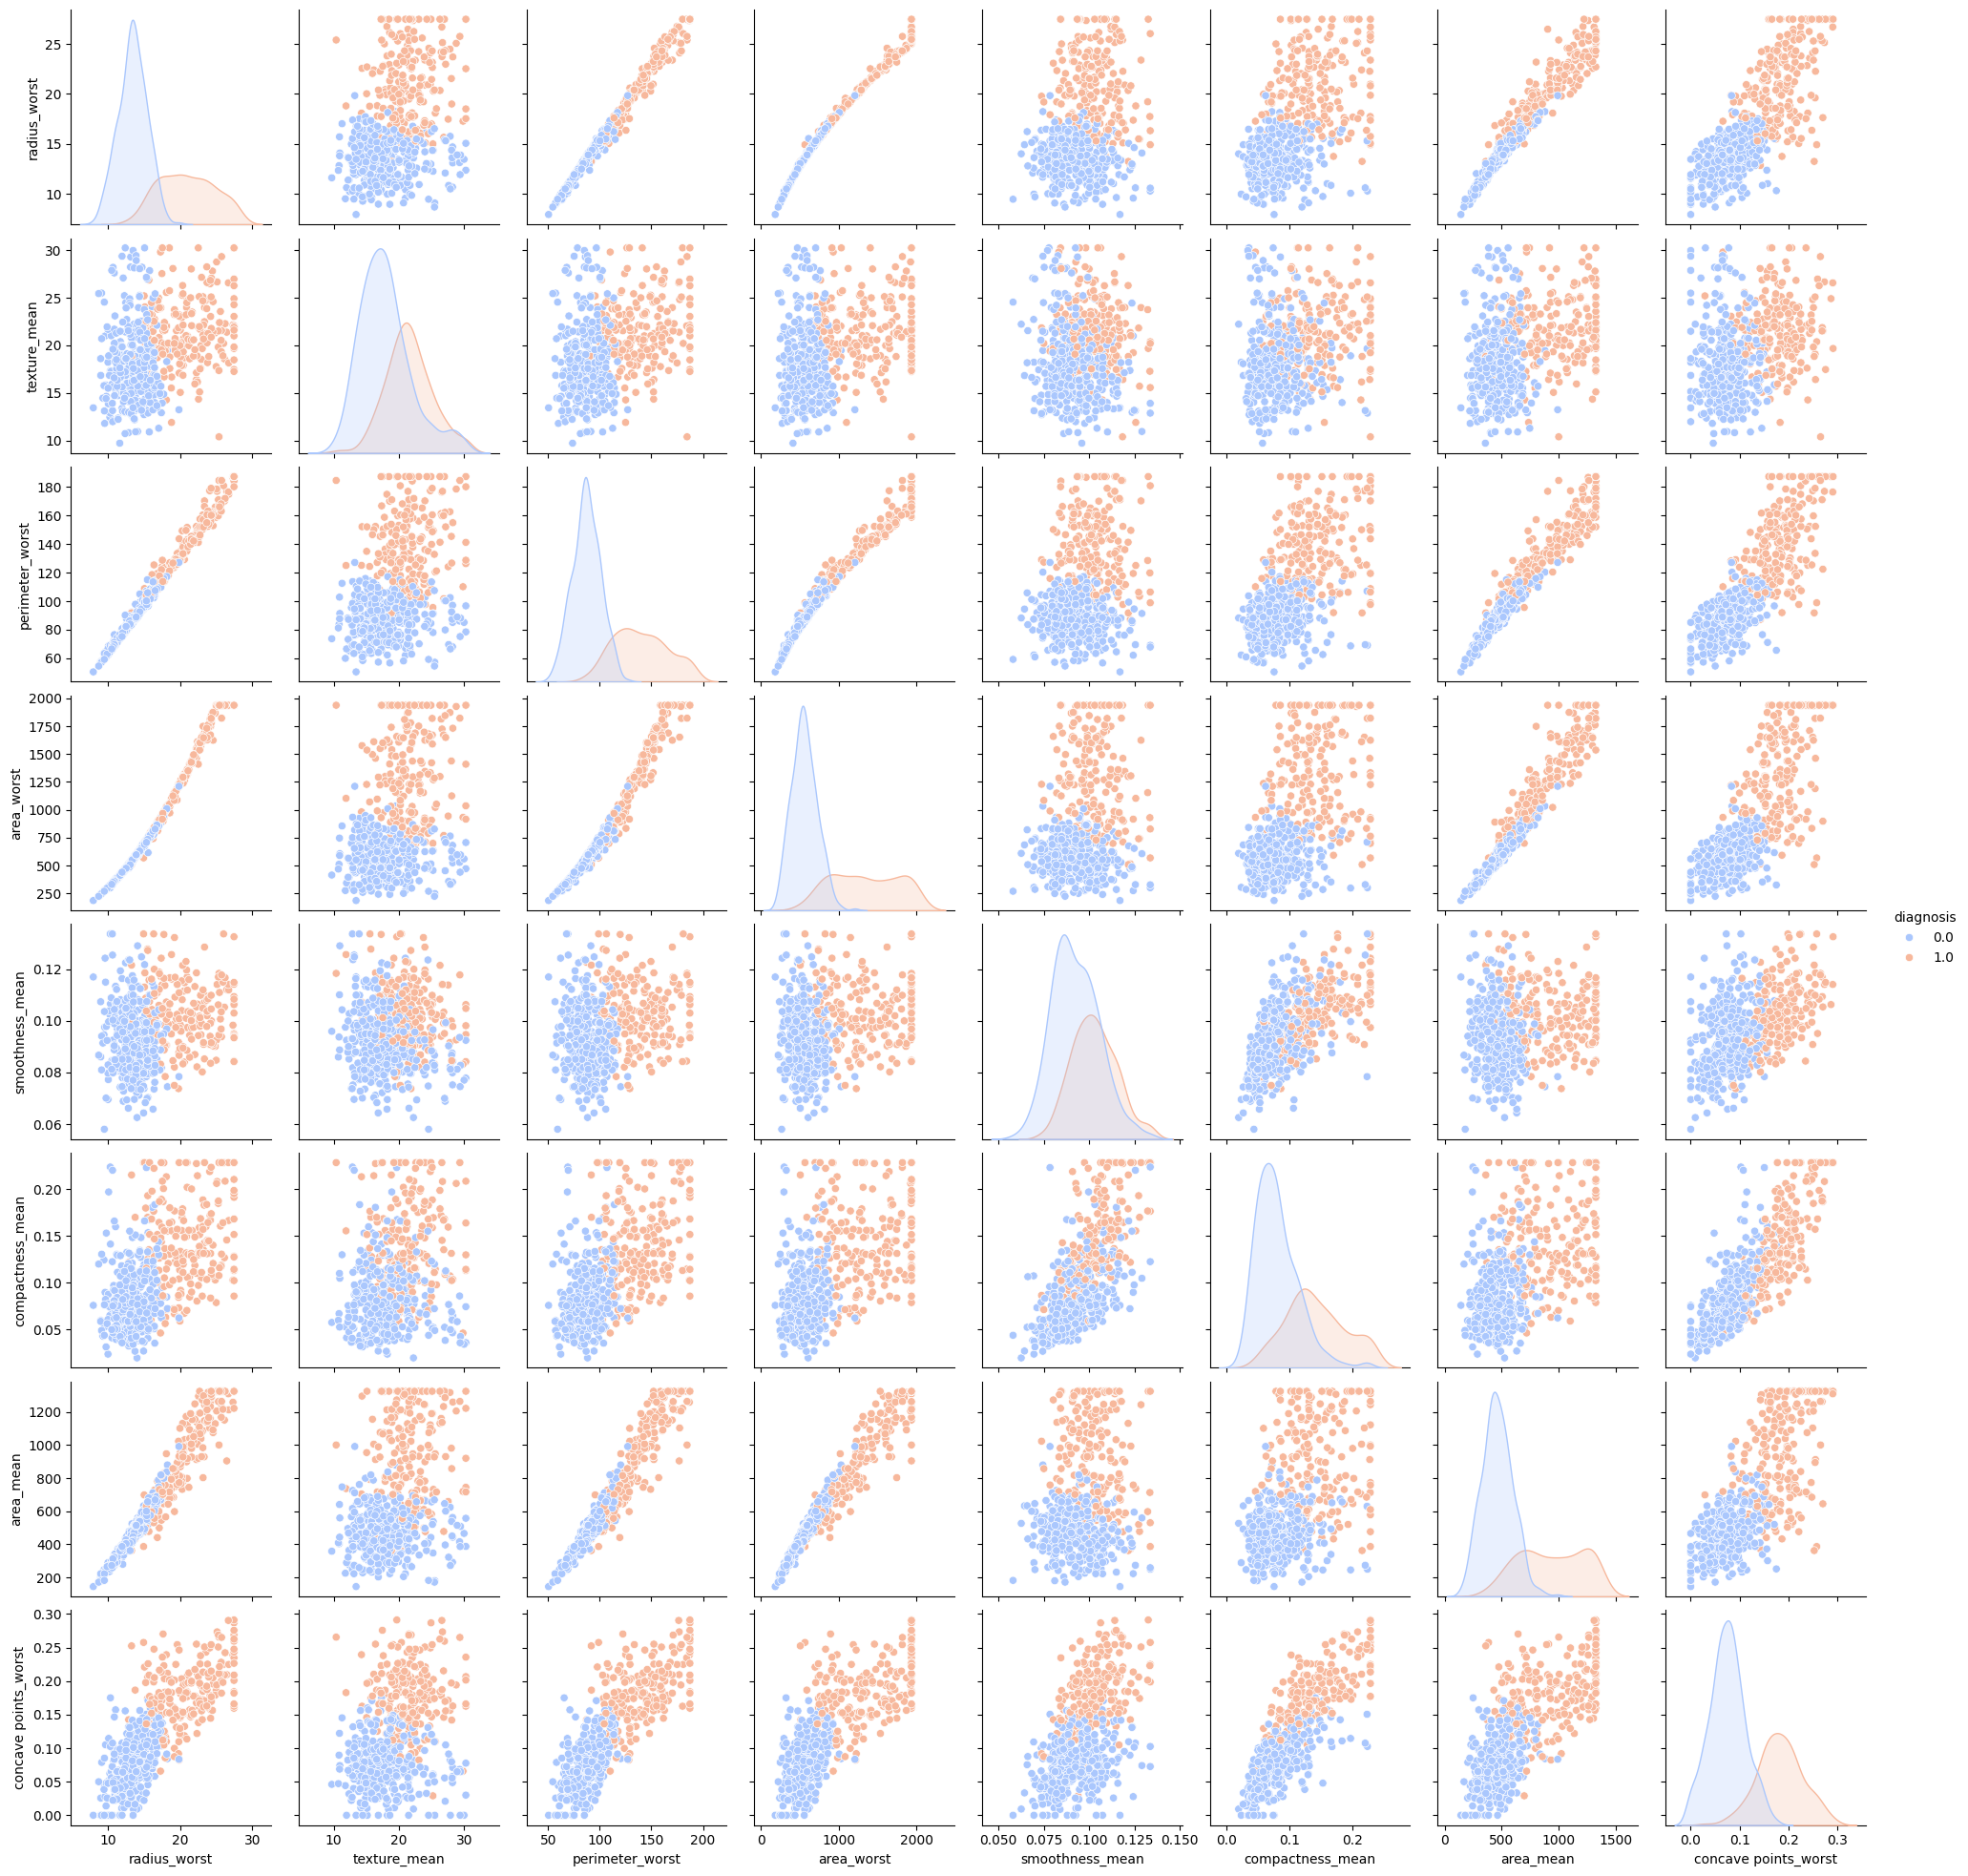

In [ ]:
import seaborn as sns
Selected_features=df[['radius_worst','texture_mean','perimeter_worst','area_worst','smoothness_mean','compactness_mean','area_mean','concave points_worst','diagnosis']]
sns.pairplot(Selected_features, hue='diagnosis', palette='coolwarm')
plt.show()

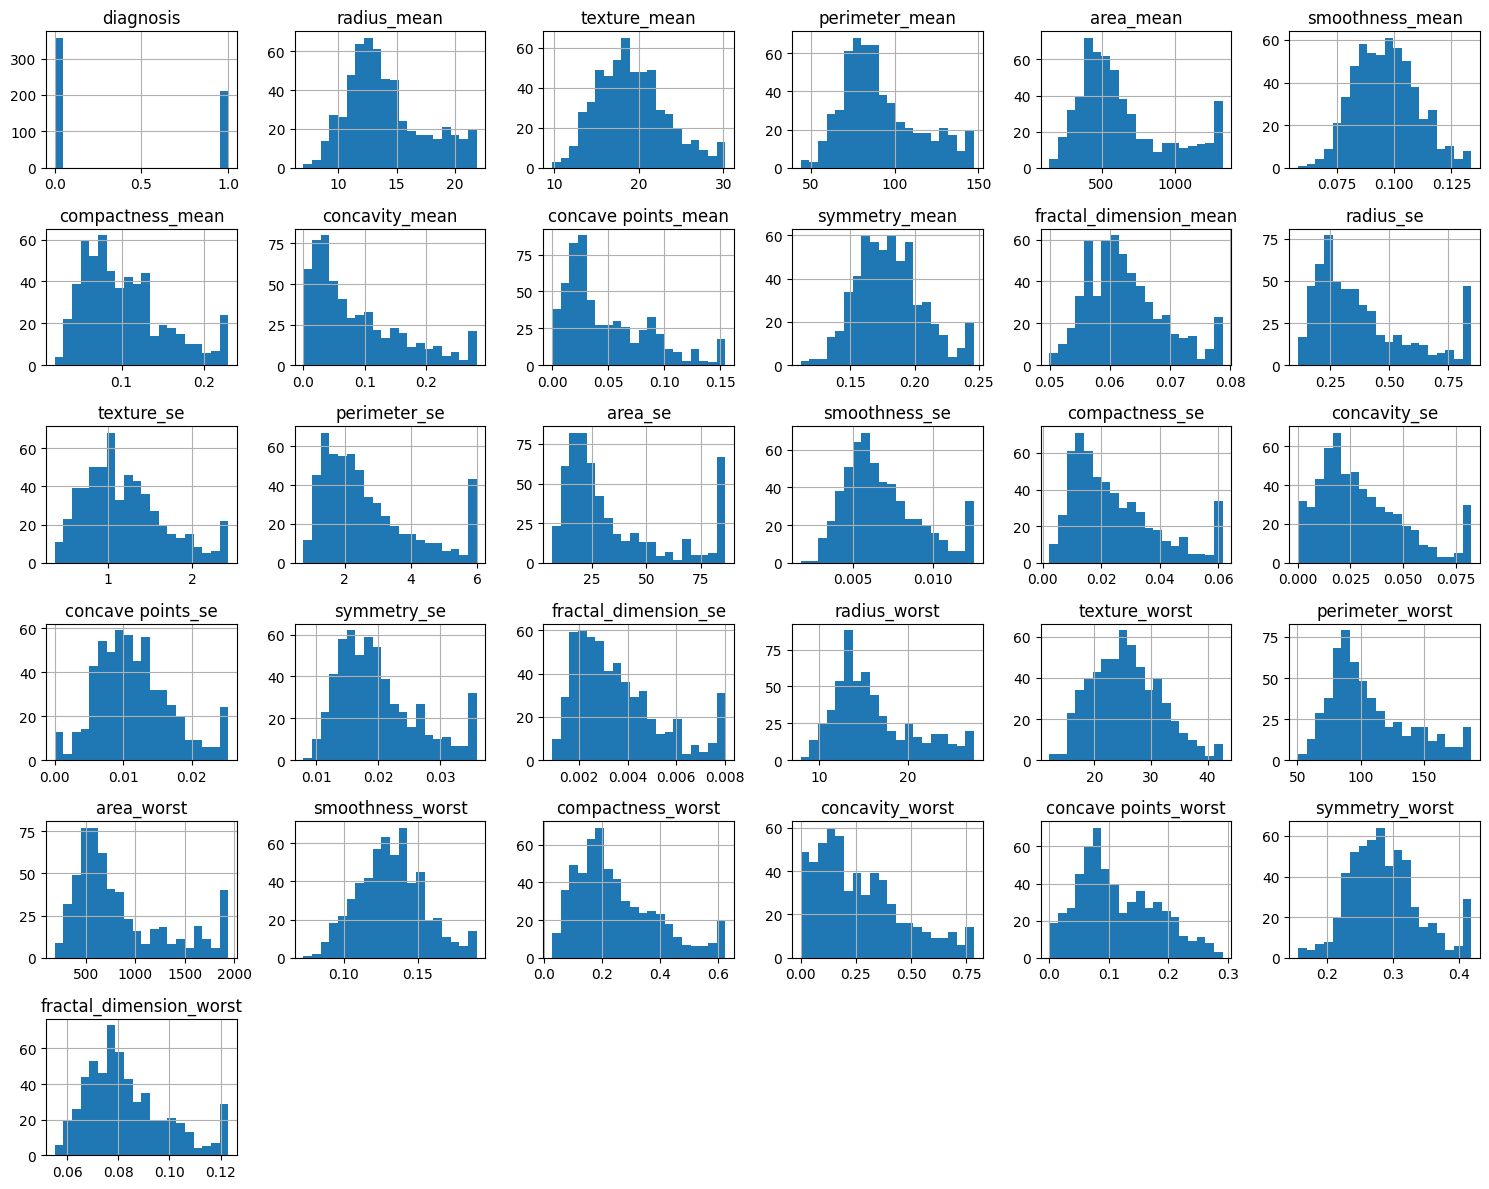

In [ ]:
import matplotlib.pyplot as plt
df.drop(['id'], axis=1, errors='ignore').hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"Original features: {X.shape[1]}")
print(f"PCA components: {X_pca.shape[1]}")

Original features: 31
PCA components: 10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, Y, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9510 - loss: 0.1787 - val_accuracy: 0.9130 - val_loss: 0.1921
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9330 - loss: 0.2004 - val_accuracy: 0.9130 - val_loss: 0.1898
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9604 - loss: 0.1581 - val_accuracy: 0.9130 - val_loss: 0.1873
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9641 - loss: 0.1596 - val_accuracy: 0.9130 - val_loss: 0.1850
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9551 - loss: 0.1625 - val_accuracy: 0.9130 - val_loss: 0.1828
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9508 - loss: 0.1738 - val_accuracy: 0.9130 - val_loss: 0.1807
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9637 - loss: 0.1397 - val_accuracy: 0.9130 - val_loss: 0.1785
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9564 - loss: 0.1577 - val_accuracy: 0.9130 - v

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9558 - loss: 0.0864
Test Accuracy: 0.9649


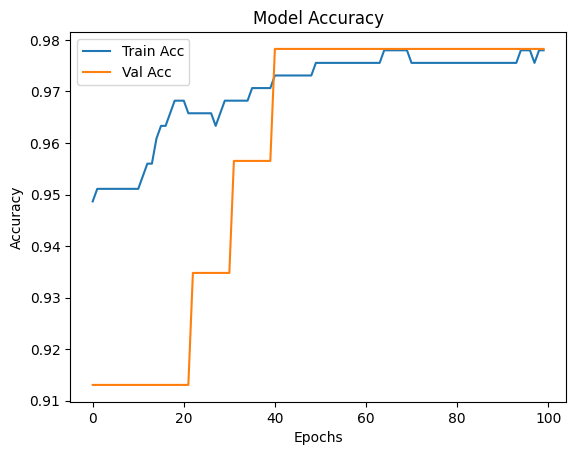

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


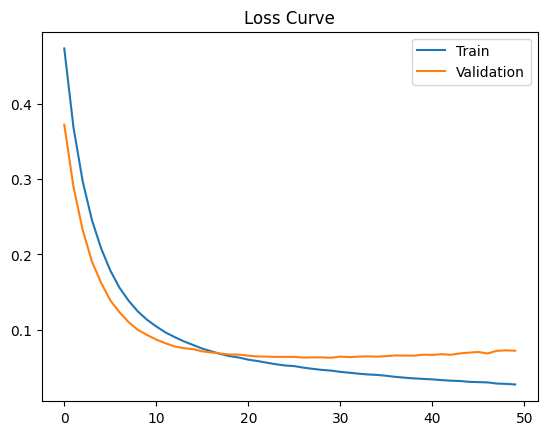

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

cm_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


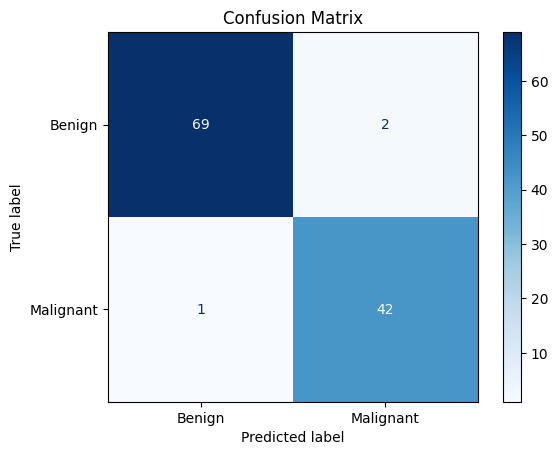

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


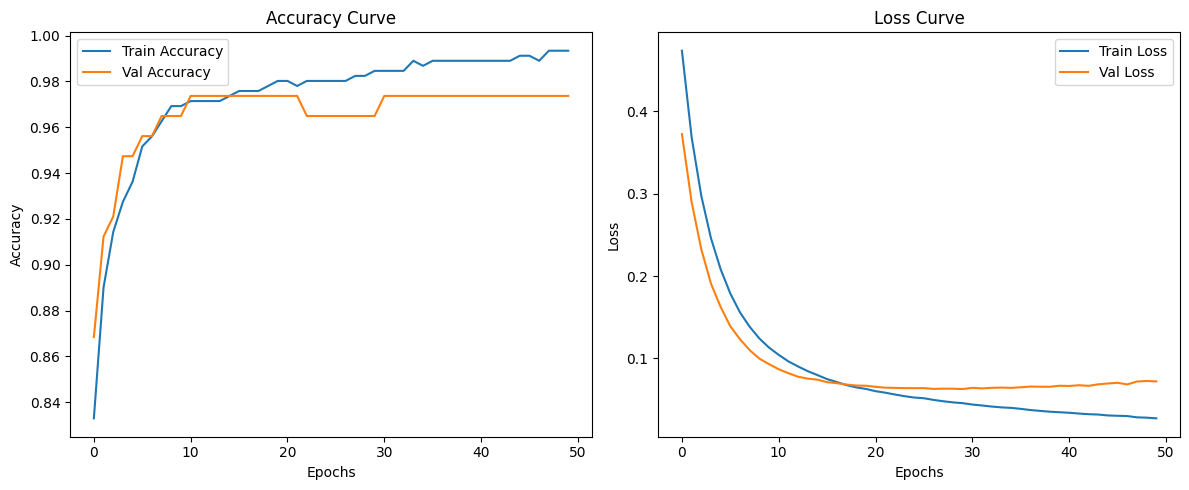

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


SVM with LINEAR kernel & C=0.01:
Accuracy: 0.9737
Confusion Matrix:
[[71  0]
 [ 3 40]]


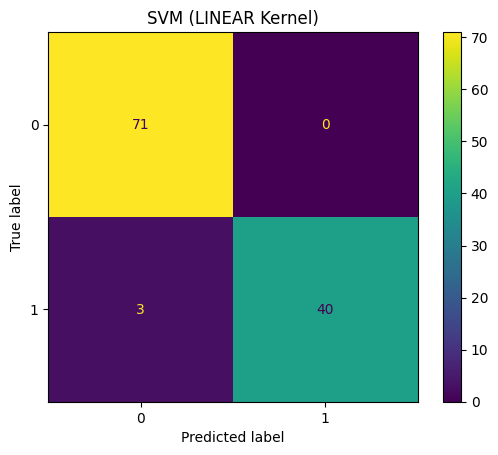


SVM with LINEAR kernel & C=1:
Accuracy: 0.9912
Confusion Matrix:
[[71  0]
 [ 1 42]]


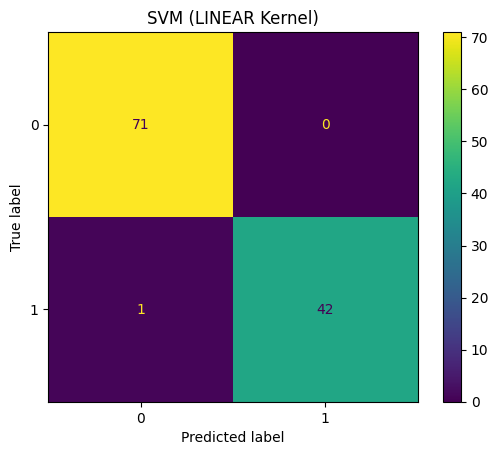


SVM with LINEAR kernel & C=10:
Accuracy: 0.9912
Confusion Matrix:
[[71  0]
 [ 1 42]]


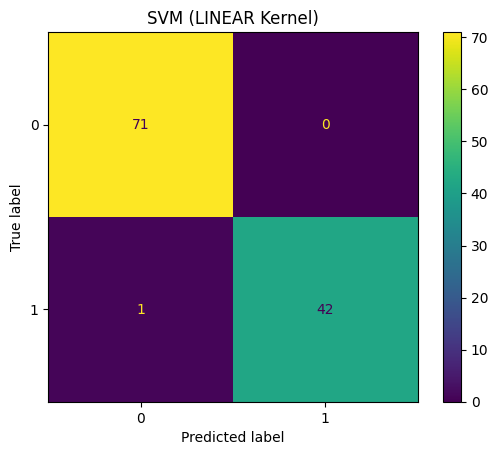


SVM with LINEAR kernel & C=30:
Accuracy: 0.9912
Confusion Matrix:
[[71  0]
 [ 1 42]]


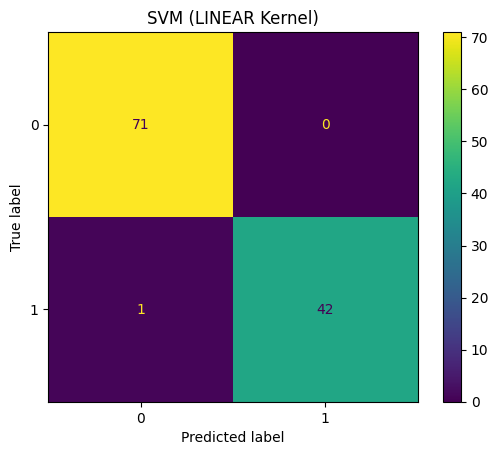


SVM with POLY kernel & C=0.01:
Accuracy: 0.8070
Confusion Matrix:
[[71  0]
 [22 21]]


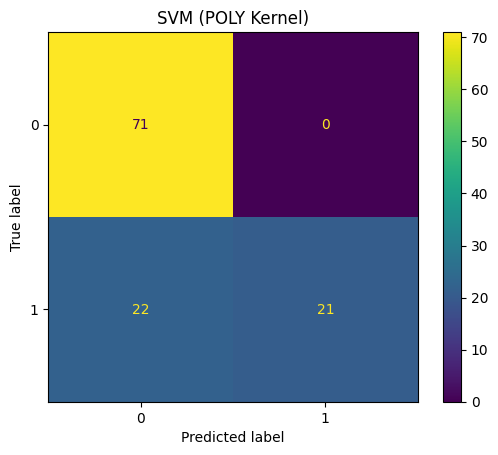


SVM with POLY kernel & C=1:
Accuracy: 0.9035
Confusion Matrix:
[[71  0]
 [11 32]]


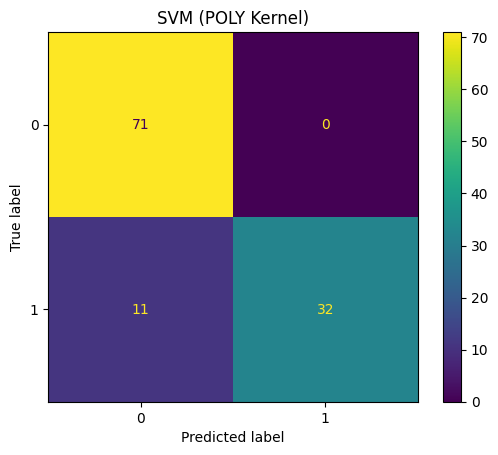


SVM with POLY kernel & C=10:
Accuracy: 0.9649
Confusion Matrix:
[[71  0]
 [ 4 39]]


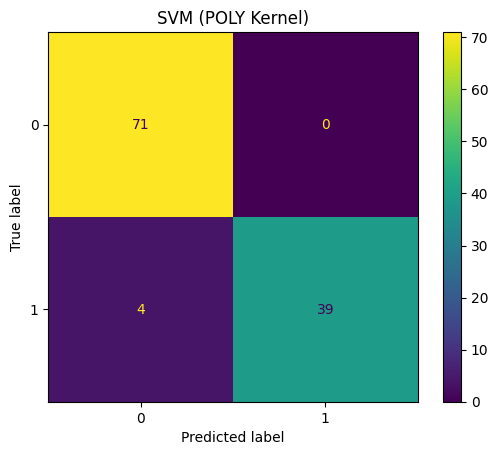


SVM with POLY kernel & C=30:
Accuracy: 0.9737
Confusion Matrix:
[[71  0]
 [ 3 40]]


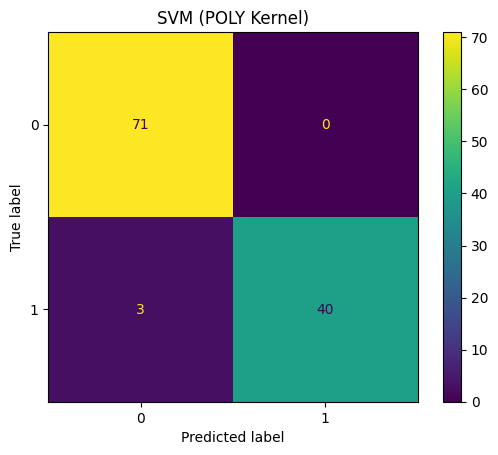


SVM with RBF kernel & C=0.01:
Accuracy: 0.6228
Confusion Matrix:
[[71  0]
 [43  0]]


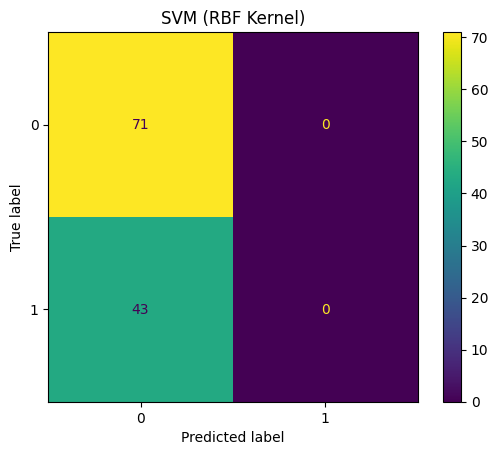


SVM with RBF kernel & C=1:
Accuracy: 0.9561
Confusion Matrix:
[[68  3]
 [ 2 41]]


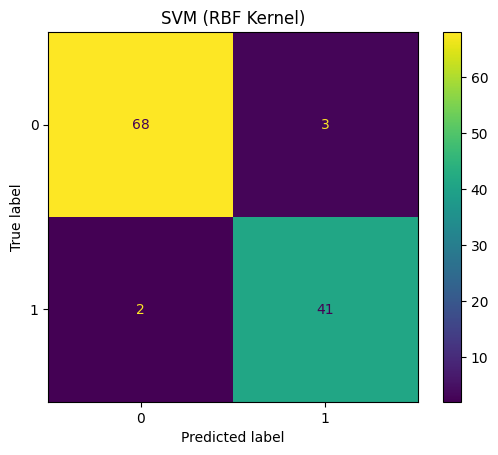


SVM with RBF kernel & C=10:
Accuracy: 0.9649
Confusion Matrix:
[[69  2]
 [ 2 41]]


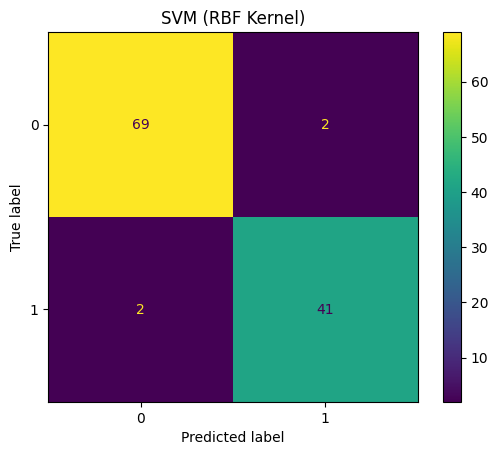


SVM with RBF kernel & C=30:
Accuracy: 0.9649
Confusion Matrix:
[[69  2]
 [ 2 41]]


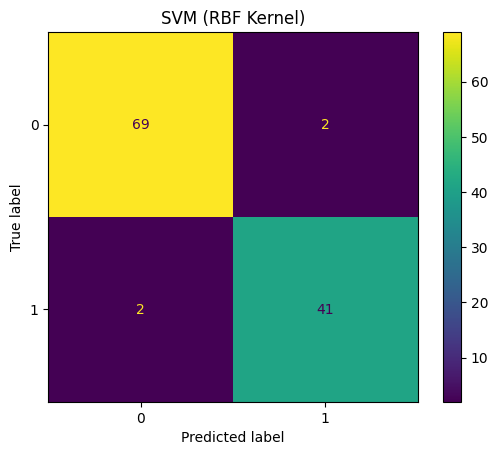

In [ ]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
c=[0.01,1,10,30]

for kernel in kernels:
  for c_value in c:
    print(f"\nSVM with {kernel.upper()} kernel & C={c_value}:")

    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3,C=c_value)
    elif kernel == 'rbf':
        svm = SVC(kernel=kernel, gamma='scale',C=c_value)
    else:
        svm = SVC(kernel=kernel,C=c_value)

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"SVM ({kernel.upper()} Kernel)")
    plt.show()


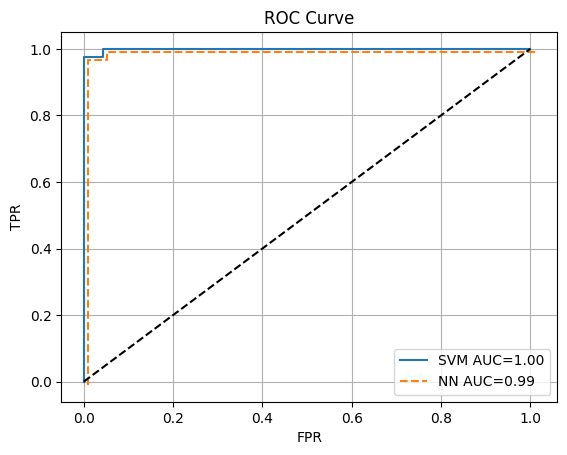

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True).fit(X_train, y_train)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
auc_svm = auc(fpr_svm, tpr_svm)
fpr_nn, tpr_nn = fpr_svm + 0.01, tpr_svm - 0.01
auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC={auc_svm:.2f}')
plt.plot(fpr_nn, tpr_nn, '--', label=f'NN AUC={auc_nn:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.legend(); plt.grid(); plt.title('ROC Curve'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
y_pred_svm = svm.predict(X_test)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
metrics['Model'].append('SVM')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_svm))
metrics['Precision'].append(precision_score(y_test, y_pred_svm))
metrics['Recall'].append(recall_score(y_test, y_pred_svm))
metrics['F1-Score'].append(f1_score(y_test, y_pred_svm))
metrics['Model'].append('Neural Network')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_nn))
metrics['Precision'].append(precision_score(y_test, y_pred_nn))
metrics['Recall'].append(recall_score(y_test, y_pred_nn))
metrics['F1-Score'].append(f1_score(y_test, y_pred_nn))
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
            Model  Accuracy  Precision    Recall  F1-Score
0             SVM  0.956140   0.931818  0.953488  0.942529
1  Neural Network  0.973684   0.954545  0.976744  0.965517
